# Bandes d'énergie de l'oxyde de magnésium (MgO)

In [23]:
#Importe la structure du matériau (MgO)
from pymatgen import MPRester

with MPRester("0GxLMrZ3A1RsWdHOh") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1009129")
    bandStructure = m.get_bandstructure_by_material_id("mp-1009129")#Pour la structure électronique

In [24]:
#Cellule pour la détermination de la bande interdite
from pymatgen.electronic_structure.bandstructure import BandStructure
bandGap= bandStructure.get_band_gap()
display(bandGap)

{'direct': False, 'energy': 3.0152, 'transition': 'K-\\Gamma'}

In [25]:
#Cellule pour la dispersion
from pymatgen.electronic_structure.plotter import BSPlotter
Chart=BSPlotter(bandStructure)
CBM=bandStructure.get_cbm()#Stocke les inforamtions concernant les minimums de la bande de conduction
VBM=bandStructure.get_vbm()#Stocke les inforamtions concernant les maximums de la bande de valence
CBMkp=CBM["kpoint"]
VBMkp=VBM["kpoint"]

from pymatgen.core.lattice import Lattice
BZLattice= Lattice(bandStructure.kpoints[0].as_dict()['lattice']['matrix']) #Pour le plot de la direction


In [26]:
#Cellule pour les masses effectives
import numpy as np
import scipy

data=Chart.bs_plot_data() #Stocke les informations du graphe des bandes d'énergie

#Sépare les différentes données importantes
distances= data['distances']
energy= data['energy']
#Formation d'une liste d'abscisses et d'une liste d'ordonnées
x=[0.0]
for i in distances:
    x=np.append(x,i[1:])
y=energy[0]["1"]
for i in energy[1:]:
    for j,k in enumerate(i["1"]):
        y[j] = np.append(y[j],k[1:])

#Polyfit retourne les coefficients polynomiaux d'un polynômede de dergé 2 sur l'intervalle spécifié
[a,b,c]=np.polyfit(x[52:92],y[7][52:92],2)#CBM
[d,e,f]=np.polyfit(x[22:62],y[6][22:62],2)#VBM
#Calcul de la masse effective
#On muliplie ici par les constantes pour avoir un résultat en kg: un angström= 10^(-10) mètres et 1 eV=scipy.constants.e Joules
masse_effBC=scipy.constants.hbar*scipy.constants.hbar/(2*a*scipy.constants.e*10**(-20))
masse_effBV=scipy.constants.hbar*scipy.constants.hbar/(2*d*scipy.constants.e*10**(-20))

Comme l'affiche la première cellule, l'oxyde de magnésium possède une bande interdite indirecte.
La bande interdite possède une énergie de  3.0152 eV et la transition se fait de K à gamma.

Sur la figure suivante on peut observer les bandes d'énergie du MgO. Les points verts indiquent les maximums de la bande de valence et les points rouges indiquent les minimums de la bande de conduction (Respectivement en-dessous et au-dessus si comme moi vous êtes daltoniens et n'y voyez aucune différence... Laissons-les à leurs couleurs imaginaires).


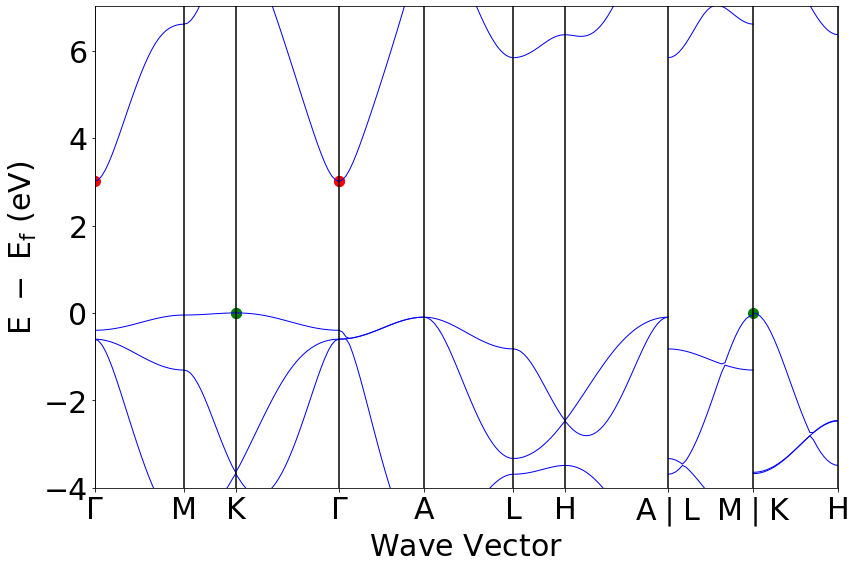

On observe effectivement que la bande interdite est indirecte.

On peut voir ci-dessous la zone de brillouin:


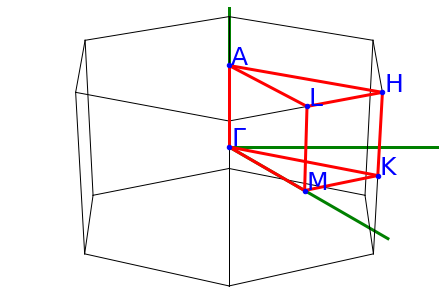

Pour la direction de dispersion on a la droite qui passe par les points bleus ci-dessous:


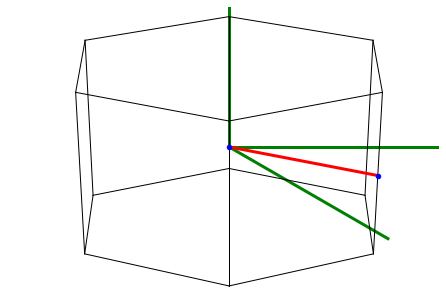

On voit que c'est la direction dans laquelle la dernière bande de valence présente le plus de dispersion et dans laquelle la première bande de conduction présente le moins de dispersion car elle passe par K (maximums de la bande valence) et qu'elle passe par Gamma (minimums de la bande de conduction).

Pour le calcul de la masse effetive en K et Gamma, j'ai supposé une dispersion parabolique sur les 2 morceaux de courbes cyans:


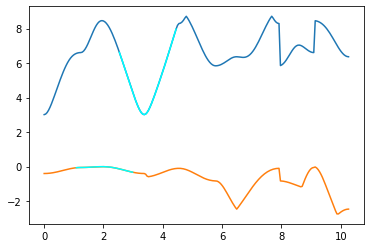

Comme 1/m = (2pi/h)^2 * la dérivée seconde de l'énergie par rapport à k, on obtient la masse effective en divisant la constante de Planck sur 2pi au carré par la dérivée seconde de l'énergie par rapport à k.
On obtiens donc:
-1.6042174130843904e-29 kg pour la masse effective au sommet de la bande de valence.
Et,  7.593412432680741e-31 kg pour la masse effective à la base de la première bande de conduction.


In [27]:
#Cellule pour l'affichage
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import plot_brillouin_zone
print("Comme l'affiche la première cellule, l'oxyde de magnésium possède une bande interdite indirecte.")
print("La bande interdite possède une énergie de ",bandGap["energy"],"eV et la transition se fait de K à gamma.")
print()
print("Sur la figure suivante on peut observer les bandes d'énergie du MgO. "
      "Les points verts indiquent les maximums de la bande de valence et les points rouges indiquent les minimums "
      "de la bande de conduction (Respectivement en-dessous et au-dessus si comme moi vous êtes daltoniens et n'y"
      " voyez aucune différence... Laissons-les à leurs couleurs imaginaires).")
Chartplot=Chart.get_plot(vbm_cbm_marker=True)
plt.show(Chartplot)
print("On observe effectivement que la bande interdite est indirecte.")
print()
print("On peut voir ci-dessous la zone de brillouin:")
Chart.plot_brillouin()
print("Pour la direction de dispersion on a la droite qui passe par les points bleus ci-dessous:")
plot_brillouin_zone(BZLattice,kpoints=[CBMkp.frac_coords,VBMkp.frac_coords],lines=[[CBMkp.frac_coords,VBMkp.frac_coords]])
print("On voit que c'est la direction dans laquelle la dernière bande de valence présente le plus "
      "de dispersion et dans laquelle la première bande de conduction présente le moins de dispersion "
      "car elle passe par K (maximums de la bande valence) et qu'elle passe par Gamma (minimums de la bande de conduction).")#CHANGER ICI
print()
print("Pour le calcul de la masse effetive en K et Gamma, j'ai supposé une dispersion parabolique sur les 2 morceaux de courbes cyans:")
plt.plot(x,y[7])
plt.plot(x,y[6])
plt.plot(x[52:92],y[7][52:92],'cyan')
plt.plot(x[22:62],y[6][22:62],'cyan')
plt.show()
print("Comme 1/m = (2pi/h)^2 * la dérivée seconde de l'énergie par rapport à k, on obtient la masse effective en divisant "
      "la constante de Planck sur 2pi au carré par la dérivée seconde de l'énergie par rapport à k.")
print("On obtiens donc:")
print(masse_effBV,"kg pour la masse effective au sommet de la bande de valence.")
print("Et, ",masse_effBC,"kg pour la masse effective à la base de la première bande de conduction.")
